### Parse `floor` and `sky`

In [1]:
import mujoco
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.6]


### Parse `floor_sky.xml`

In [2]:
xml_path = '../asset/object/floor_sky.xml'
env = MuJoCoParserClass(name='Floor',rel_xml_path=xml_path,VERBOSE=True)

dt:[0.0020] HZ:[500]
n_dof (=nv):[0]
n_geom:[1]
geom_names:['floor']
n_body:[1]
body_names:['world']
n_joint:[0]
joint_names:[]
joint_types:[]
joint_ranges:
[]
n_rev_joint:[0]
rev_joint_idxs:[]
rev_joint_names:[]
rev_joint_mins:[]
rev_joint_maxs:[]
rev_joint_ranges:[]
n_pri_joint:[0]
pri_joint_idxs:[]
pri_joint_names:[]
pri_joint_mins:[]
pri_joint_maxs:[]
pri_joint_ranges:[]
n_ctrl:[0]
ctrl_names:[]
ctrl_joint_idxs:[]
ctrl_qvel_idxs:[]
ctrl_ranges:
[]
n_sensor:[0]
sensor_names:[]
n_site:[0]
site_names:[]


### Render

Pressed ESC
Quitting.


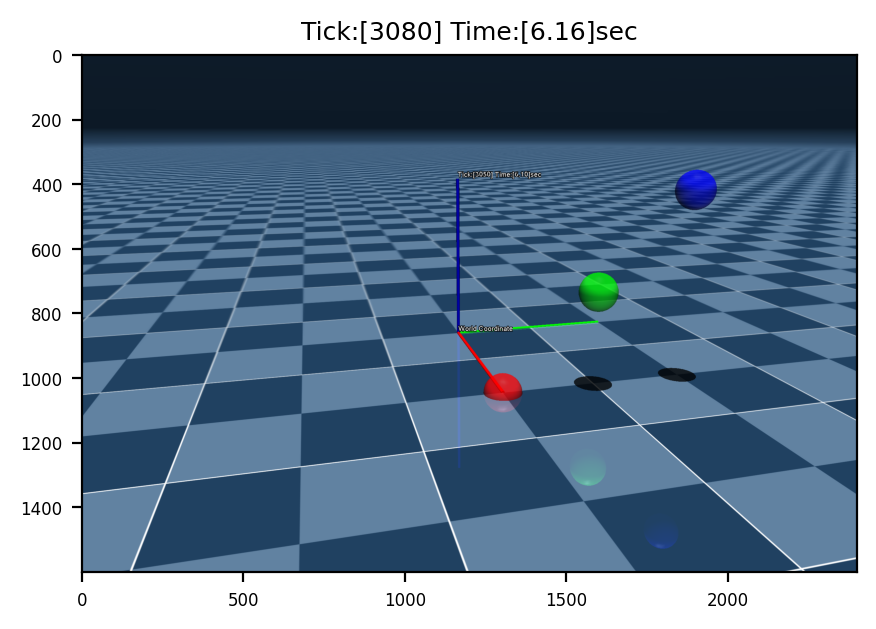

Done.


In [3]:
env.init_viewer(viewer_title='UR5e',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=174.08,distance=4.0,elevation=-33,lookat=[0.1,0.05,0.16],
                  VIS_TRANSPARENT=False,VIS_CONTACTPOINT=True,
                  contactwidth=0.05,contactheight=0.05,contactrgba=np.array([1,0,0,1]),
                  VIS_JOINT=True,jointlength=0.5,jointwidth=0.1,
                  jointrgba=[0.2,0.6,0.8,0.6])
env.reset()
while (env.get_sim_time() < 100.0) and env.is_viewer_alive():
    env.step()
    
    # Plot functionalities
    if (env.tick%10) == 0:
        env.plot_T(p=np.zeros(3,),R=np.eye(3),
                   PLOT_AXIS=True,axis_len=1.0,axis_width=0.01,
                   PLOT_SPHERE=False,sphere_r=0.05,sphere_rgba=[1,0,0,0.5],
                   axis_rgba=None,label='World Coordinate')
        env.plot_T(p=np.array([0,0,1]),R=np.eye(3),PLOT_AXIS=False,
                   label='Tick:[%d] Time:[%.2f]sec'%(env.tick,env.get_sim_time()))
        env.plot_T(p=np.array([1,0.0,0.0]),R=np.eye(3),PLOT_AXIS=False,
                   PLOT_SPHERE=True,sphere_r=0.1,sphere_rgba=[1,0,0,0.5])
        env.plot_T(p=np.array([1,0.5,0.5]),R=np.eye(3),PLOT_AXIS=False,
                   PLOT_SPHERE=True,sphere_r=0.1,sphere_rgba=[0,1,0,0.5])
        env.plot_T(p=np.array([1,1,1]),R=np.eye(3),PLOT_AXIS=False,
                   PLOT_SPHERE=True,sphere_r=0.1,sphere_rgba=[0,0,1,0.5])
        env.render()
    # Save the current view
    if env.loop_every(HZ=10): scene_img = env.grab_image()
# Plot the final scene
plt.figure(figsize=(5,4)); plt.imshow(scene_img)
plt.title("Tick:[%d] Time:[%.2f]sec"%(env.tick,env.get_sim_time()),fontsize=9)
plt.show()
env.close_viewer()
print ("Done.")